In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from mpl_toolkits.basemap import Basemap
from matplotlib.colorbar import ColorbarBase

In [2]:
#mpl settings
matplotlib.rcParams.update({'font.size': 18})

In [3]:
#stations_df contains df of stations we want to plot
stations_full = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')
stations_df = stations_full[['Station_Name','Station_Latitude','Station_Longitude']].drop_duplicates()

In [4]:
#stationlookup_df maps stations_df to the eventual ratios
stationlookup_df = pd.read_csv('stationtotablelookup.csv')
stationlookup_df.set_index('MAP', inplace=True)

In [5]:
stations_df_merged = pd.merge(stations_df,stationlookup_df,how='left',left_on='Station_Name',right_index=True)

In [6]:
t_month_total_complete_df = pd.read_csv('month_total_complete.csv')
month_total_complete_df = t_month_total_complete_df.convert_objects(convert_numeric=True)
#month_total_complete_df.head()
month_total_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13779 entries, 0 to 13778
Data columns (total 10 columns):
Unnamed: 0    13778 non-null float64
index         13778 non-null float64
STATION       13778 non-null object
MONTH         13778 non-null float64
ENTRIES       13778 non-null float64
ENTRIES.1     13778 non-null float64
ENTRIES.2     13778 non-null float64
EXITS         13778 non-null float64
EXITS.1       13778 non-null float64
EXITS.2       13778 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [7]:
months2017 = range(201701,201709)
months2016 = range(201601,201613)
months = [201512] + list(months2016) + list(months2017)
months = [201601]
#months

In [36]:
df = final_stations_df.sort_values('ENTRIES', ascending=False)
df.iloc[250:300]

,Station_Name,Station_Latitude,Station_Longitude,STATION,Unnamed: 0,index,MONTH,ENTRIES,ENTRIES.1,ENTRIES.2,EXITS,EXITS.1,EXITS.2
60,Atlantic Av-Barclays Ctr,40.683666,-73.978810,ATL AV-BARCLAY,4507.0,4507.0,201601.0,761.0,9.811392e+08,9.811384e+08,3.0,1.722154e+09,1.722154e+09
799,Atlantic Av-Barclays Ctr,40.684359,-73.977666,ATL AV-BARCLAY,4507.0,4507.0,201601.0,761.0,9.811392e+08,9.811384e+08,3.0,1.722154e+09,1.722154e+09
121,Fort Hamilton Parkway,40.640914,-73.994304,FT HAMILTON PKY,8249.0,8249.0,201601.0,743.0,5.495266e+06,5.494523e+06,273.0,4.377690e+06,4.377417e+06
158,Fort Hamilton Parkway,40.631386,-74.005351,FT HAMILTON PKY,8249.0,8249.0,201601.0,743.0,5.495266e+06,5.494523e+06,273.0,4.377690e+06,4.377417e+06
565,Fort Hamilton Parkway,40.650782,-73.975776,FT HAMILTON PKY,8249.0,8249.0,201601.0,743.0,5.495266e+06,5.494523e+06,273.0,4.377690e+06,4.377417e+06
145,Bay Parkway,40.601875,-73.993728,BAY PKWY,4950.0,4950.0,201601.0,699.0,1.006633e+08,1.006626e+08,0.0,1.084822e+07,1.084822e+07
149,25th Av,40.597704,-73.986829,25 AV,1948.0,1948.0,201601.0,626.0,2.164359e+06,2.163733e+06,40.0,8.477360e+05,8.476960e+05
627,63rd Drive-Rego Park,40.729846,-73.861604,63 DR-REGO PARK,3329.0,3329.0,201601.0,534.0,1.007552e+08,1.007546e+08,329.0,4.565207e+06,4.564878e+06
8,30 Av-Grand Av,40.766779,-73.921479,30 AV,2153.0,2153.0,201601.0,512.0,1.050764e+07,1.050713e+07,15222.0,1.897137e+07,1.895615e+07
786,Park Place,40.713051,-74.008811,PARK PLACE,11382.0,11382.0,201601.0,359.0,8.391150e+07,8.391114e+07,0.0,1.681292e+07,1.681292e+07


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=965918.0678160673,170198.32777403962,1045532.9343544657,264798.7937422434&bboxSR=2263&imageSR=2263&size=500,594&dpi=96&format=png32&f=image


/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


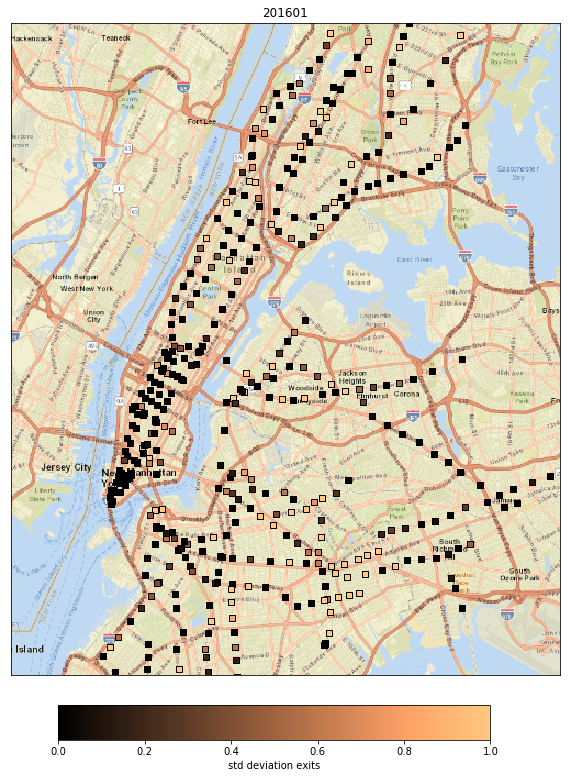

In [17]:
for month in months:
    station_ratios_df = month_total_complete_df[ 
            (month_total_complete_df['MONTH'] == month)
          ]
    station_ratios_df.set_index('STATION', inplace=True)

    final_stations_df = pd.merge(stations_df_merged,station_ratios_df,how='left',left_on='STATION',right_index=True)
    final_stations_df.fillna(0)

    #get lists that we can plot
    station_names = final_stations_df.Station_Name.tolist()
    station_lons = final_stations_df.Station_Longitude.tolist()
    station_lats = final_stations_df.Station_Latitude.tolist()
    station_exits_raw = final_stations_df.EXITS.tolist()
    station_exits = [float(station_exit_raw) for station_exit_raw in station_exits_raw]

    plt.figure(figsize=(12,12))
    ax = plt.gca() 
    fig = plt.gcf()
    
    max_exits = final_stations_df.EXITS.std()

    #GeoJSON bounding box from http://boundingbox.klokantech.com/
    bounds = [[[-74.0660476685,40.6338126519],[-73.7783432007,40.6338126519],[-73.7783432007,40.8932724824],[-74.0660476685,40.8932724824],[-74.0660476685,40.6338126519]]]
    map = Basemap(llcrnrlon=bounds[0][0][0],llcrnrlat=bounds[0][0][1],urcrnrlon=bounds[0][2][0],urcrnrlat=bounds[0][2][1],
                 resolution='c', projection='tmerc', lat_0 = 40.7, lon_0 = -73.9, epsg = 2263)
    service = 'World_Street_Map'
    #service = 'ESRI_StreetMap_World_2D'
    map.arcgisimage(service=service, xpixels = 500, verbose= True)

    # convert lat and lon to map projection coordinates
    lons, lats = map(station_lons, station_lats)

    # color map
    cmap = plt.cm.get_cmap('copper')
    map.scatter(lons, lats, c=station_exits, vmin=0.0, vmax=max_exits, cmap=cmap, edgecolors='black', marker='s', zorder=5)
    plt.title('{0:g}'.format(month))

    # color bar
    cax = fig.add_axes([0.25, 0.05, 0.5, 0.04])
    cb = ColorbarBase(cax, cmap=cmap, orientation='horizontal')
    cb.ax.set_xlabel('std deviation exits')
#    cb.set_ticks([-100.0,100.0])

    plt.show()
    #  plt.savefig('{}.png'.format(month))

In [40]:
ratios_df = pd.read_csv('9-2016_to_9-2017_ratios.csv')
ratios_df.groupby('STATION', as_index=False).sum()

,STATION,Unnamed: 0,WEEKDAY,MORN_AFT_EVENING_LATE,Unnamed: 0.1,D_ENTRIES,D_EXITS,TOTAL_ENTRIES_EXITS,HOUR,RATIO
0,1 AV,378,84,42,260079511,7432086.0,7781808.0,15213894.0,250495,-0.497252
1,103 ST,1162,84,42,1363479693,10795662.0,7306826.0,18102488.0,363483,3.715863
2,103 ST-CORONA,1946,84,42,1381736078,6820679.0,4980587.0,11801266.0,225759,0.782825
3,104 ST,2730,84,42,1776093524,1260803.0,500494.0,1761297.0,222841,6.497923
4,110 ST,3514,84,42,1439027382,4012783.0,3101163.0,7113946.0,150822,2.052821
5,111 ST,4298,84,42,4741575655,5614165.0,3461367.0,9075532.0,395657,2.340311
6,116 ST,5082,84,42,8689243090,11690461.0,6315924.0,18006385.0,534061,6.768026
7,116 ST-COLUMBIA,5866,84,42,2820875457,4824230.0,2437903.0,7262133.0,146960,8.305871
8,121 ST,6650,84,42,2442363525,515286.0,302724.0,818010.0,125004,5.447368
9,125 ST,7434,84,42,26936196317,27323996.0,20449692.0,47773688.0,1069413,3.406470


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=965918.0678160673,170198.32777403962,1045532.9343544657,264798.7937422434&bboxSR=2263&imageSR=2263&size=500,594&dpi=96&format=png32&f=image


/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


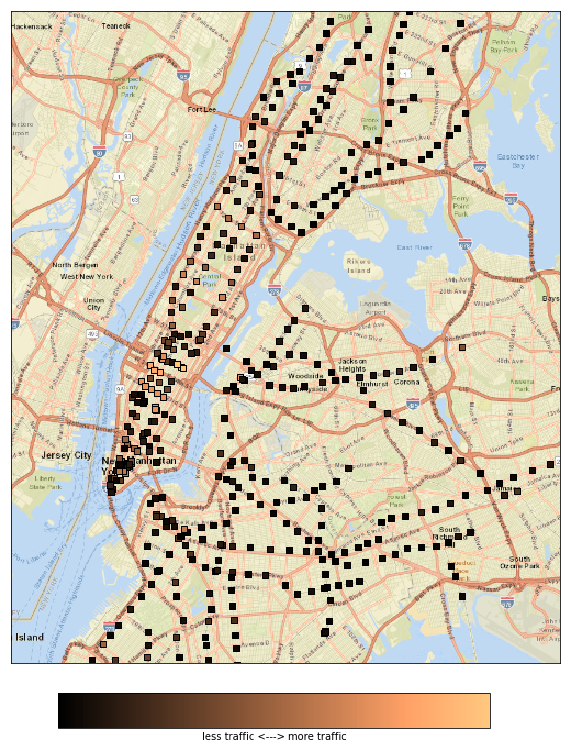

In [42]:
ratios_df = pd.read_csv('9-2016_to_9-2017_ratios.csv')
station_ratios_df = ratios_df.groupby('STATION', as_index=False).sum()
station_ratios_df.set_index('STATION', inplace=True)

final_stations_df = pd.merge(stations_df_merged,station_ratios_df,how='left',left_on='STATION',right_index=True)
final_stations_df.head()

#get lists that we can plot
station_names = final_stations_df.Station_Name.tolist()
station_lons = final_stations_df.Station_Longitude.tolist()
station_lats = final_stations_df.Station_Latitude.tolist()
station_ratios = final_stations_df.TOTAL_ENTRIES_EXITS.tolist()

DOWs = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
TODs = ['Mornings','Afternoons','Evenings','(Late) Nights']

plt.figure(figsize=(12,12))
ax = plt.gca() 
fig = plt.gcf()

#GeoJSON bounding box from http://boundingbox.klokantech.com/
bounds = [[[-74.0660476685,40.6338126519],[-73.7783432007,40.6338126519],[-73.7783432007,40.8932724824],[-74.0660476685,40.8932724824],[-74.0660476685,40.6338126519]]]
map = Basemap(llcrnrlon=bounds[0][0][0],llcrnrlat=bounds[0][0][1],urcrnrlon=bounds[0][2][0],urcrnrlat=bounds[0][2][1],
             resolution='c', projection='tmerc', lat_0 = 40.7, lon_0 = -73.9, epsg = 2263)
service = 'World_Street_Map'
#service = 'ESRI_StreetMap_World_2D'
map.arcgisimage(service=service, xpixels = 500, verbose= True)

# convert lat and lon to map projection coordinates
lons, lats = map(station_lons, station_lats)

# color map
cmap = plt.cm.get_cmap('copper')
map.scatter(lons, lats, c=station_ratios, vmin=0.0, vmax=max(station_ratios), cmap=cmap, edgecolors='black', marker='s', zorder=5)
#plt.title('{} {}'.format(DOWs[i],TODs[j]))

# color bar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.04])
cb = ColorbarBase(cax, cmap=cmap, orientation='horizontal')
cb.ax.set_xlabel('less traffic <---> more traffic')
cb.set_ticks([-100.0,100.0])

# plt.show()
#plt.savefig('{}-{}.png'.format(DOWs[i],TODs[j]))

In [ ]:
for i in range(7):
    for j in range(4):
        ratios_df = pd.read_csv('9-2016_to_9-2017_ratios.csv')
        station_ratios_df = ratios_df[ 
                (ratios_df['WEEKDAY'] == i) &
                (ratios_df['MORN_AFT_EVENING_LATE'] == j)
              ]
        station_ratios_df.set_index('STATION', inplace=True)

        final_stations_df = pd.merge(stations_df_merged,station_ratios_df,how='left',left_on='STATION',right_index=True)
        final_stations_df.head()

        #get lists that we can plot
        station_names = final_stations_df.Station_Name.tolist()
        station_lons = final_stations_df.Station_Longitude.tolist()
        station_lats = final_stations_df.Station_Latitude.tolist()
        station_ratios = final_stations_df.RATIO.tolist()

        DOWs = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
        TODs = ['Mornings','Afternoons','Evenings','(Late) Nights']

        plt.figure(figsize=(12,12))
        ax = plt.gca() 
        fig = plt.gcf()

        #GeoJSON bounding box from http://boundingbox.klokantech.com/
        bounds = [[[-74.0660476685,40.6338126519],[-73.7783432007,40.6338126519],[-73.7783432007,40.8932724824],[-74.0660476685,40.8932724824],[-74.0660476685,40.6338126519]]]
        map = Basemap(llcrnrlon=bounds[0][0][0],llcrnrlat=bounds[0][0][1],urcrnrlon=bounds[0][2][0],urcrnrlat=bounds[0][2][1],
                     resolution='c', projection='tmerc', lat_0 = 40.7, lon_0 = -73.9, epsg = 2263)
        service = 'World_Street_Map'
        #service = 'ESRI_StreetMap_World_2D'
        map.arcgisimage(service=service, xpixels = 500, verbose= True)

        # convert lat and lon to map projection coordinates
        lons, lats = map(station_lons, station_lats)

        # color map
        cmap = plt.cm.get_cmap('RdYlGn')
        map.scatter(lons, lats, c=station_ratios, vmin=-0.5, vmax=0.5, cmap=cmap, edgecolors='black', marker='s', zorder=5)
        plt.title('{} {}'.format(DOWs[i],TODs[j]))

        # color bar
        cax = fig.add_axes([0.25, 0.05, 0.5, 0.04])
        cb = ColorbarBase(cax, cmap=cmap, orientation='horizontal')
        cb.ax.set_xlabel('more exiting <---> more entering')
        cb.set_ticks([-100.0,100.0])

        # plt.show()
        plt.savefig('{}-{}.png'.format(DOWs[i],TODs[j]))